In [32]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pydotplus
import sys
import os
from IPython.display import Image 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [33]:
data = pd.read_csv('male.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,age,face_score,height,weight,salary,category
0,18,100,183,70,9300.0,good
1,55,50,177,72,3720.0,poor
2,20,50,180,180,6510.0,poor
3,21,50,170,65,46500.0,good
4,25,50,174,63,10850.0,average
...,...,...,...,...,...,...
75,24,0,166,75,8370.0,poor
76,29,0,167,77,13020.0,poor
77,36,100,178,69,37200.0,good
78,35,0,167,72,11160.0,poor


In [34]:
X = data.iloc[:, : -1]
y = data["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train

34       poor
1        poor
4     average
11       good
60       poor
       ...   
22    average
47       good
25    average
58       good
45       good
Name: category, Length: 64, dtype: object

In [35]:
clf = DecisionTreeClassifier(criterion="gini", class_weight=None, max_depth=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [36]:
clf.classes_

array(['average', 'good', 'poor'], dtype=object)

In [37]:
clf.score(X_test, y_test)

0.8125

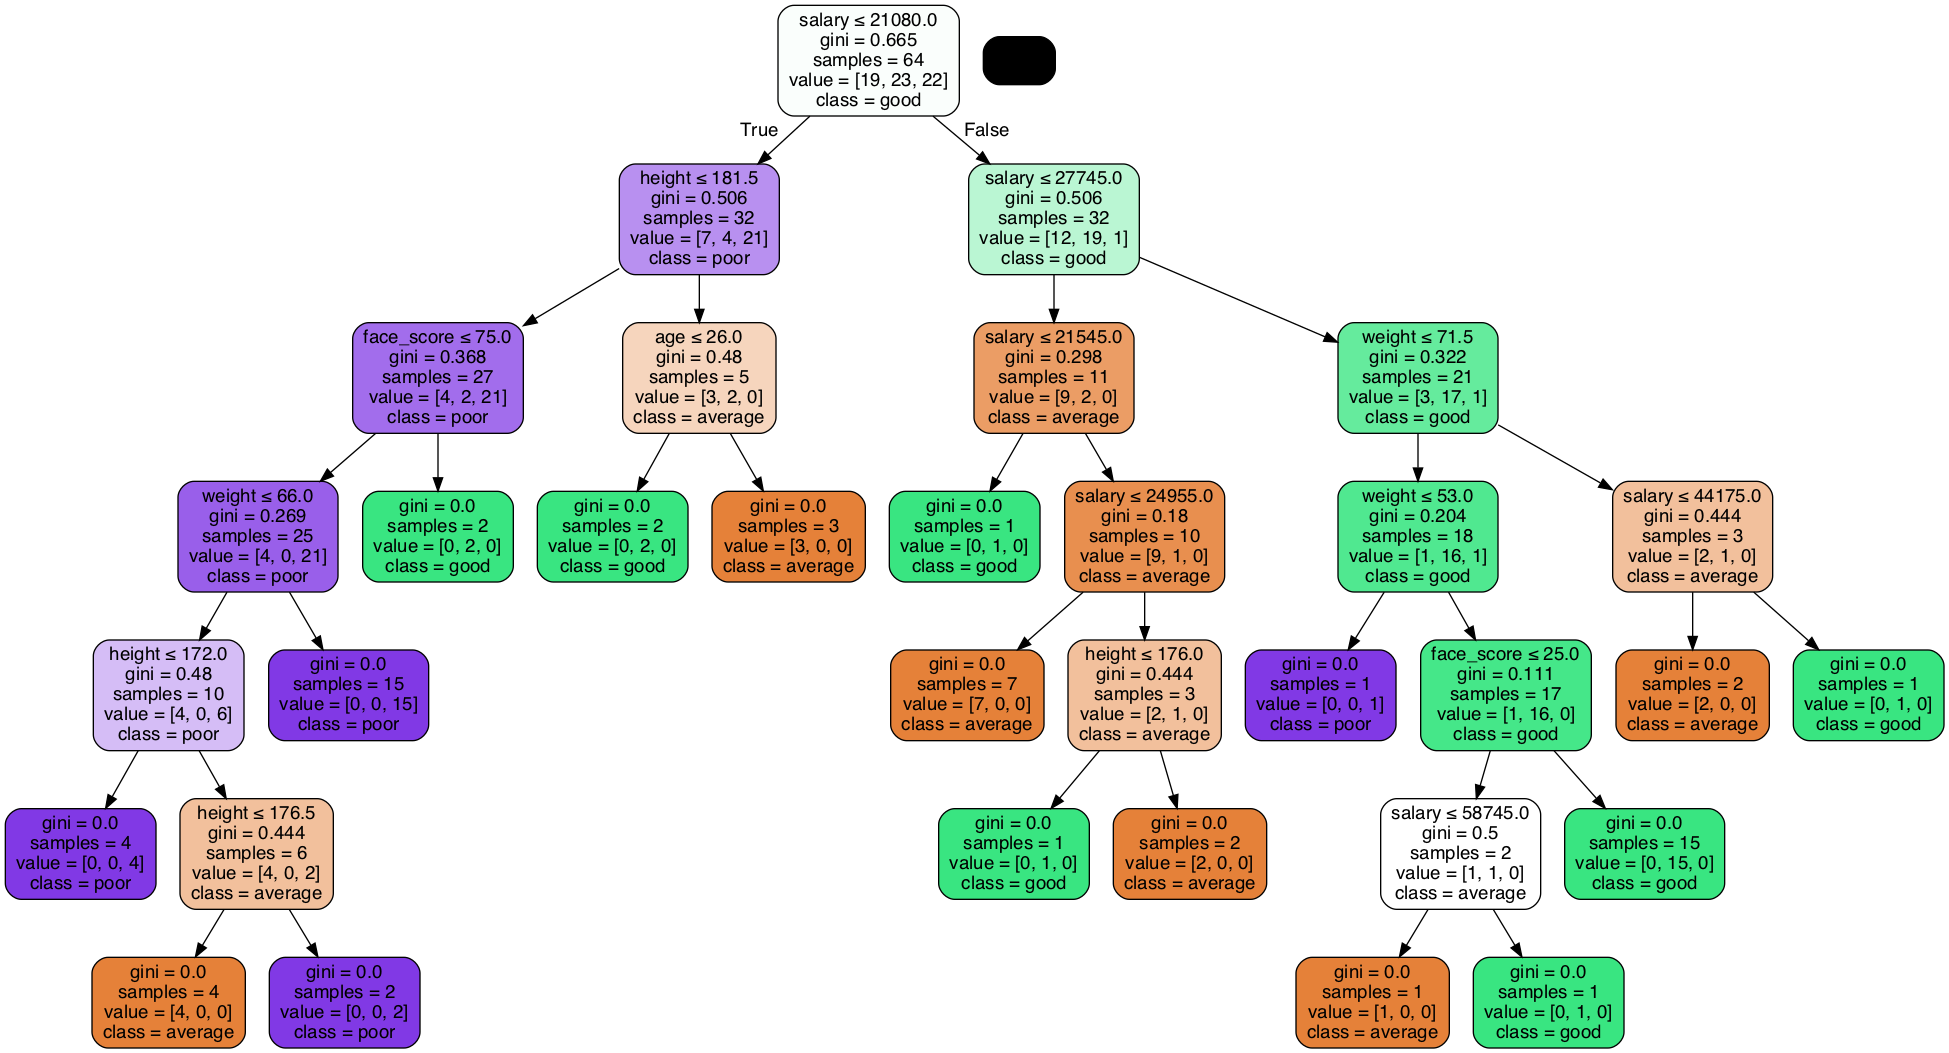

In [38]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["age", "face_score", "height", "weight", "salary"],  
                         class_names=clf.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 